(1257, 64) (540, 64) (1257,) (540,)
Without PCA and LDA Result: 0.9740740740740741
PCA Results:
 Number of PCs  Accuracy
             1  0.288889
             2  0.503704
             3  0.672222
             4  0.788889
             5  0.853704
             6  0.872222
             7  0.918519
             8  0.933333
             9  0.937037
            10  0.938889
            11  0.938889
            12  0.937037
            13  0.959259
            14  0.955556
            15  0.959259
            16  0.962963
            17  0.962963
            18  0.961111
            19  0.961111
            20  0.962963
            21  0.970370
            22  0.966667
            23  0.968519
            24  0.970370
            25  0.970370
            26  0.968519
            27  0.974074
            28  0.972222
            29  0.972222
            30  0.970370
            31  0.975926
            32  0.972222
            33  0.975926
            34  0.975926
            35  0.977778
    

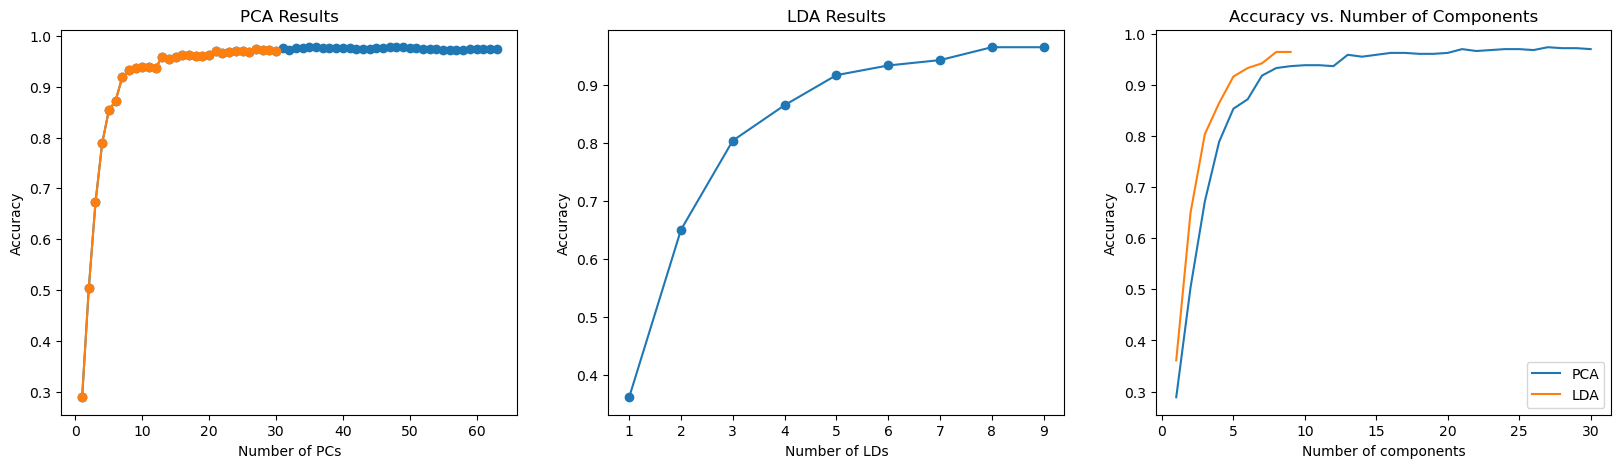

In [14]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = load_digits()
X = data.data
y = data.target
target_names = data.target_names
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classifier without PCA and LDA
# Train classifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
    
# Predict on testing set and evaluate performance
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Without PCA and LDA Result:",accuracy)

# PCA
pca_results = []
for pc in range(1, 64):
    # Apply PCA and train classifier
    pca = PCA(n_components=pc)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Train classifier
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train_pca, y_train)
    
    # Predict on testing set and evaluate performance
    y_pred = classifier.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    pca_results.append([pc, accuracy])

# LDA
lda_results = []
num_classes = len(np.unique(y_train))
for ld in range(1, num_classes):
    # Apply LDA and train classifier
    lda = LinearDiscriminantAnalysis(n_components=ld)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)
    
    # Train classifier
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train_lda, y_train)
    
    # Predict on testing set and evaluate performance
    y_pred = classifier.predict(X_test_lda)
    accuracy = accuracy_score(y_test, y_pred)
    lda_results.append([ld, accuracy])

# Print results in table
pca_df = pd.DataFrame(pca_results, columns=['Number of PCs', 'Accuracy'])
lda_df = pd.DataFrame(lda_results, columns=['Number of LDs', 'Accuracy'])

print("PCA Results:")
print(pca_df.to_string(index=False))
print("\nLDA Results:")
print(lda_df.to_string(index=False))

# Visualize results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ax[0].plot(pca_df['Number of PCs'], pca_df['Accuracy'], '-o')
ax[0].plot(pca_df['Number of PCs'][0:30], pca_df['Accuracy'][0:30], '-o')
ax[0].set_xlabel('Number of PCs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('PCA Results')
ax[1].plot(lda_df['Number of LDs'], lda_df['Accuracy'], '-o')
ax[1].set_xlabel('Number of LDs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('LDA Results')

ax[2].plot(pca_df['Number of PCs'][0:30], pca_df['Accuracy'][0:30], label='PCA')
ax[2].plot(lda_df['Number of LDs'], lda_df['Accuracy'], label='LDA')
ax[2].set_xlabel('Number of components')
ax[2].set_ylabel('Accuracy')
ax[2].set_title('Accuracy vs. Number of Components')
ax[2].legend()


plt.show()
